# CAR PRICE PREDICTION.
                                                                              MAJOR PROJECT

## Importing Required Libraries

In [2]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
%matplotlib inline
import sklearn as sk
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
import pickle 

## Load The Data

In [3]:
train_data=pd.read_excel("F:\PROJECTS\ML Major\Major-Project-Submissions-master\datasets\Data_Train.xlsx")
test_data=pd.read_excel("F:\PROJECTS\ML Major\Major-Project-Submissions-master\datasets\Data_Test.xlsx")

## Analysind Structure Of The Data

In [4]:
train_data.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,1.75
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,12.50
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,4.50
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,6.00
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,17.74


In [5]:
test_data.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats
0,Maruti Alto K10 LXI CNG,Delhi,2014,40929,CNG,Manual,First,32.26 km/kg,998 CC,58.2 bhp,4.0
1,Maruti Alto 800 2016-2019 LXI,Coimbatore,2013,54493,Petrol,Manual,Second,24.7 kmpl,796 CC,47.3 bhp,5.0
2,Toyota Innova Crysta Touring Sport 2.4 MT,Mumbai,2017,34000,Diesel,Manual,First,13.68 kmpl,2393 CC,147.8 bhp,7.0
3,Toyota Etios Liva GD,Hyderabad,2012,139000,Diesel,Manual,First,23.59 kmpl,1364 CC,null bhp,5.0
4,Hyundai i20 Magna,Mumbai,2014,29000,Petrol,Manual,First,18.5 kmpl,1197 CC,82.85 bhp,5.0


In [6]:
train_data.shape

(6019, 12)

In [7]:
test_data.shape

(1234, 11)

In [8]:
train_data.columns.tolist()

['Name',
 'Location',
 'Year',
 'Kilometers_Driven',
 'Fuel_Type',
 'Transmission',
 'Owner_Type',
 'Mileage',
 'Engine',
 'Power',
 'Seats',
 'Price']

In [9]:
train_data.describe()

,Year,Kilometers_Driven,Seats,Price
count,6019.000000,6.019000e+03,5977.000000,6019.000000
mean,2013.358199,5.873838e+04,5.278735,9.479468
std,3.269742,9.126884e+04,0.808840,11.187917
min,1998.000000,1.710000e+02,0.000000,0.440000
25%,2011.000000,3.400000e+04,5.000000,3.500000
50%,2014.000000,5.300000e+04,5.000000,5.640000
75%,2016.000000,7.300000e+04,5.000000,9.950000
max,2019.000000,6.500000e+06,10.000000,160.000000


In [10]:
test_data.describe()

,Year,Kilometers_Driven,Seats
count,1234.000000,1234.000000,1223.000000
mean,2013.400324,58507.288493,5.284546
std,3.179700,35598.702098,0.825622
min,1996.000000,1000.000000,2.000000
25%,2011.000000,34000.000000,5.000000
50%,2014.000000,54572.500000,5.000000
75%,2016.000000,75000.000000,5.000000
max,2019.000000,350000.000000,10.000000


In [11]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6019 entries, 0 to 6018
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               6019 non-null   object 
 1   Location           6019 non-null   object 
 2   Year               6019 non-null   int64  
 3   Kilometers_Driven  6019 non-null   int64  
 4   Fuel_Type          6019 non-null   object 
 5   Transmission       6019 non-null   object 
 6   Owner_Type         6019 non-null   object 
 7   Mileage            6017 non-null   object 
 8   Engine             5983 non-null   object 
 9   Power              5983 non-null   object 
 10  Seats              5977 non-null   float64
 11  Price              6019 non-null   float64
dtypes: float64(2), int64(2), object(8)
memory usage: 564.4+ KB


In [12]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1234 entries, 0 to 1233
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               1234 non-null   object 
 1   Location           1234 non-null   object 
 2   Year               1234 non-null   int64  
 3   Kilometers_Driven  1234 non-null   int64  
 4   Fuel_Type          1234 non-null   object 
 5   Transmission       1234 non-null   object 
 6   Owner_Type         1234 non-null   object 
 7   Mileage            1234 non-null   object 
 8   Engine             1224 non-null   object 
 9   Power              1224 non-null   object 
 10  Seats              1223 non-null   float64
dtypes: float64(1), int64(2), object(8)
memory usage: 106.2+ KB


In [13]:
train_data['Name'].nunique()

1876

It is hard to analyse the data with soo many kinds of different cars. Hence we create two new columns, Brand and Model from this column.

In [14]:
train_data['Brand']=train_data['Name'].str.split(" ",1)
train_data['Brand']=train_data['Brand'].str.get(0)
train_data['Model']=train_data['Name'].str.split(" ",2)
train_data['Model']=train_data['Model'].str.get(1)
test_data['Brand']=test_data['Name'].str.split(" ",1)
test_data['Brand']=test_data['Brand'].str.get(0)
test_data['Model']=test_data['Name'].str.split(" ",2)
test_data['Model']=test_data['Model'].str.get(1)


In [15]:
train_data['Brand'].nunique()

31

In [16]:
train_data['Model'].nunique()

212

In [17]:
train_data.sample(5)

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Brand,Model
5239,Audi Q5 2.0 TDI,Hyderabad,2013,72000,Diesel,Automatic,First,14.16 kmpl,1968 CC,174.3 bhp,5.0,29.00,Audi,Q5
5405,Audi Q7 3.0 TDI Quattro Premium Plus,Delhi,2014,58000,Diesel,Automatic,First,12.07 kmpl,2967 CC,241.4 bhp,7.0,32.00,Audi,Q7
1887,Maruti Ritz VXi,Mumbai,2012,29000,Petrol,Manual,First,18.5 kmpl,1197 CC,85.80 bhp,5.0,3.25,Maruti,Ritz
2046,Maruti SX4 Vxi BSIII,Mumbai,2008,62000,Petrol,Manual,Second,15.0 kmpl,1586 CC,104.68 bhp,5.0,2.11,Maruti,SX4
2596,Hyundai i10 Sportz 1.2,Hyderabad,2011,60000,Petrol,Manual,First,20.36 kmpl,1197 CC,78.9 bhp,5.0,3.20,Hyundai,i10


In [18]:
train_data[train_data['Power']=='null bhp']['Power'].count()

107

In [19]:
test_data[test_data['Power']=='null bhp']['Power'].count()

22

In [20]:
train_data['Power']=train_data['Power'].replace(to_replace="[null]" , value = np.NaN , regex = True)
train_data.isnull().sum()

Name                   0
Location               0
Year                   0
Kilometers_Driven      0
Fuel_Type              0
Transmission           0
Owner_Type             0
Mileage                2
Engine                36
Power                143
Seats                 42
Price                  0
Brand                  0
Model                  0
dtype: int64

In [21]:
test_data['Power']=test_data['Power'].replace(to_replace="[null]" , value = np.NaN , regex = True)
test_data.isnull().sum()

Name                  0
Location              0
Year                  0
Kilometers_Driven     0
Fuel_Type             0
Transmission          0
Owner_Type            0
Mileage               0
Engine               10
Power                32
Seats                11
Brand                 0
Model                 0
dtype: int64

There are null values in mileage, engine, power ans seat columns. Filling these nulkl values might create noise. Also when we buy a second-hand car we do not check for these proprties which would have changed by the course of time. So it is better to remove them.

In [22]:
train_data.drop('Name', axis = 1, inplace = True)
test_data.drop('Name', axis = 1, inplace = True)
train_data.drop('Mileage', axis = 1, inplace = True)
test_data.drop('Mileage', axis = 1, inplace = True)
train_data.drop('Power', axis = 1, inplace = True)
test_data.drop('Power', axis = 1, inplace = True)
train_data.drop('Engine', axis = 1, inplace = True)
test_data.drop('Engine', axis = 1, inplace = True)


In [23]:
train_data.head(5)

,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Seats,Price,Brand,Model
0,Mumbai,2010,72000,CNG,Manual,First,5.0,1.75,Maruti,Wagon
1,Pune,2015,41000,Diesel,Manual,First,5.0,12.50,Hyundai,Creta
2,Chennai,2011,46000,Petrol,Manual,First,5.0,4.50,Honda,Jazz
3,Chennai,2012,87000,Diesel,Manual,First,7.0,6.00,Maruti,Ertiga
4,Coimbatore,2013,40670,Diesel,Automatic,Second,5.0,17.74,Audi,A4


There cannot be 0 seats in any car. So, we fill the null values with mode of that column.

In [24]:
train_data['Seats'].fillna(train_data['Seats'].mode()[0] , inplace = True)

In [25]:
test_data['Seats'].fillna(test_data['Seats'].mode()[0] , inplace = True)

In [26]:
train_data.isnull().sum()

Location             0
Year                 0
Kilometers_Driven    0
Fuel_Type            0
Transmission         0
Owner_Type           0
Seats                0
Price                0
Brand                0
Model                0
dtype: int64

In [27]:
test_data.isnull().sum()

Location             0
Year                 0
Kilometers_Driven    0
Fuel_Type            0
Transmission         0
Owner_Type           0
Seats                0
Brand                0
Model                0
dtype: int64

In [28]:
train_data.describe(include='all')

,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Seats,Price,Brand,Model
count,6019,6019.000000,6.019000e+03,6019,6019,6019,6019.000000,6019.000000,6019,6019
unique,11,NaN,NaN,5,2,4,NaN,NaN,31,212
top,Mumbai,NaN,NaN,Diesel,Manual,First,NaN,NaN,Maruti,Swift
freq,790,NaN,NaN,3205,4299,4929,NaN,NaN,1211,353
mean,NaN,2013.358199,5.873838e+04,NaN,NaN,NaN,5.276790,9.479468,NaN,NaN
std,NaN,3.269742,9.126884e+04,NaN,NaN,NaN,0.806346,11.187917,NaN,NaN
min,NaN,1998.000000,1.710000e+02,NaN,NaN,NaN,0.000000,0.440000,NaN,NaN
25%,NaN,2011.000000,3.400000e+04,NaN,NaN,NaN,5.000000,3.500000,NaN,NaN
50%,NaN,2014.000000,5.300000e+04,NaN,NaN,NaN,5.000000,5.640000,NaN,NaN
75%,NaN,2016.000000,7.300000e+04,NaN,NaN,NaN,5.000000,9.950000,NaN,NaN


In [29]:
test_data.describe(include='all')


,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Seats,Brand,Model
count,1234,1234.000000,1234.000000,1234,1234,1234,1234.000000,1234,1234
unique,11,NaN,NaN,4,2,4,NaN,29,161
top,Mumbai,NaN,NaN,Diesel,Manual,First,NaN,Maruti,Swift
freq,159,NaN,NaN,647,905,1023,NaN,233,65
mean,NaN,2013.400324,58507.288493,NaN,NaN,NaN,5.282010,NaN,NaN
std,NaN,3.179700,35598.702098,NaN,NaN,NaN,0.822366,NaN,NaN
min,NaN,1996.000000,1000.000000,NaN,NaN,NaN,2.000000,NaN,NaN
25%,NaN,2011.000000,34000.000000,NaN,NaN,NaN,5.000000,NaN,NaN
50%,NaN,2014.000000,54572.500000,NaN,NaN,NaN,5.000000,NaN,NaN
75%,NaN,2016.000000,75000.000000,NaN,NaN,NaN,5.000000,NaN,NaN


## UNIVARIATE ANALYSIS

### Brand

In [30]:
train_data.Brand.nunique()

31

In [31]:
train_data.Brand.value_counts()

Maruti           1211
Hyundai          1107
Honda             608
Toyota            411
Mercedes-Benz     318
Volkswagen        315
Ford              300
Mahindra          272
BMW               267
Audi              236
Tata              186
Skoda             173
Renault           145
Chevrolet         121
Nissan             91
Land               60
Jaguar             40
Fiat               28
Mitsubishi         27
Mini               26
Volvo              21
Porsche            18
Jeep               15
Datsun             13
Force               3
ISUZU               2
Ambassador          1
Bentley             1
Lamborghini         1
Isuzu               1
Smart               1
Name: Brand, dtype: int64

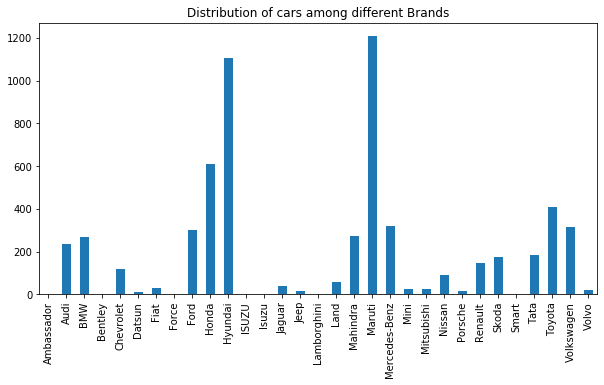

In [32]:
plt.figure(figsize=(10,5))
plt.title("Distribution of cars among different Brands")
train_data.Brand.value_counts().sort_index().plot(kind='bar')
plt.show()

Most of the cars were purchased from Maruti and Hyundai brands wheres least number of cars were puchased from Bently, Smart, Ambassador, Isuzu and Lamborghini(only one car to be precise)

### Owner Type

In [33]:
train_data['Owner_Type'].nunique()

4

In [34]:
train_data['Owner_Type'].unique()

array(['First', 'Second', 'Fourth & Above', 'Third'], dtype=object)

In [35]:
train_data['Owner_Type'].value_counts()

First             4929
Second             968
Third              113
Fourth & Above       9
Name: Owner_Type, dtype: int64

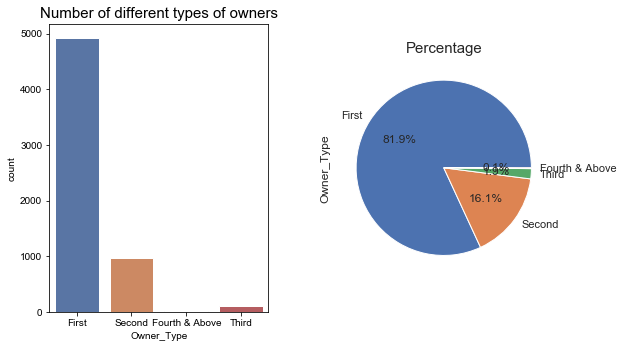

In [36]:
plt.figure(figsize=(10,10))
plt.subplots_adjust(left=0.100,bottom=0.2,right=0.8,top=0.6,wspace=0.3,hspace=0.3)

plt.subplot(121)
plt.title('Number of different types of owners',fontsize=15)
sb.set(style='whitegrid')
sb.countplot(x=train_data['Owner_Type'])
plt.subplot(122)
plt.title('Percentage',fontsize=15)
train_data['Owner_Type'].value_counts().plot.pie(autopct='%1.1f%%')

Sales of first-hand cars is the highest.

### Price

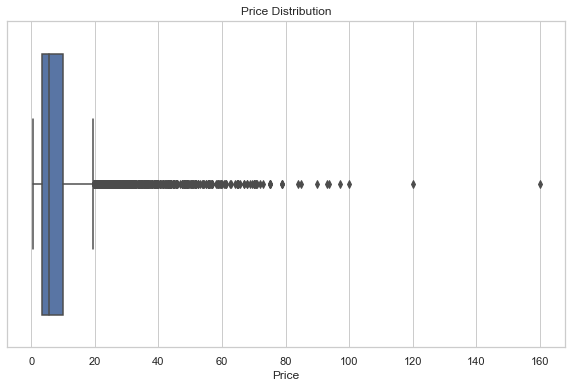

In [37]:
plt.figure(figsize=(10,6))
plt.title("Price Distribution")
sb.boxplot(x=train_data.Price)

### Location

In [38]:
train_data['Location'].nunique()

11

In [39]:
train_data['Location'].unique()

array(['Mumbai', 'Pune', 'Chennai', 'Coimbatore', 'Hyderabad', 'Jaipur',
       'Kochi', 'Kolkata', 'Delhi', 'Bangalore', 'Ahmedabad'],
      dtype=object)

In [40]:
train_data['Location'].value_counts()

Mumbai        790
Hyderabad     742
Kochi         651
Coimbatore    636
Pune          622
Delhi         554
Kolkata       535
Chennai       494
Jaipur        413
Bangalore     358
Ahmedabad     224
Name: Location, dtype: int64

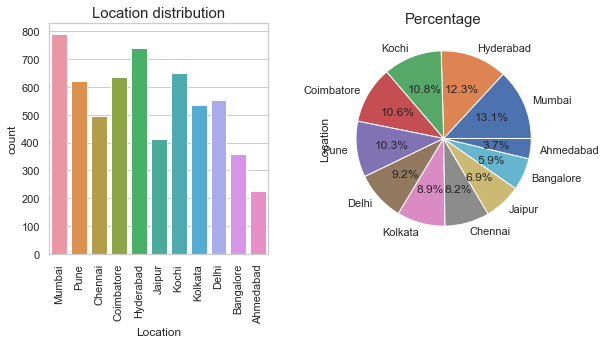

In [41]:
plt.figure(figsize=(10,8))
plt.subplots_adjust(left=0.100,bottom=0.2,right=0.8,top=0.6,wspace=0.3,hspace=0.3)

plt.subplot(121)
plt.title('Location distribution',fontsize=15)
sb.set(style='whitegrid')
ax=sb.countplot(x=train_data['Location'])
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
plt.subplot(122)
plt.title('Percentage',fontsize=15)
train_data['Location'].value_counts().plot.pie(autopct='%1.1f%%')

Highest sales of cars is observed in Mumbai and Hyderabad among all the available cities. In the cities Ahmedabad and Banglore sales were comparitively less.

### Year

In [42]:
train_data['Year'].nunique()

22

In [43]:
train_data['Year'].unique()

array([2010, 2015, 2011, 2012, 2013, 2016, 2018, 2014, 2017, 2007, 2009,
       2008, 2019, 2006, 2005, 2004, 2002, 2000, 2003, 1999, 2001, 1998],
      dtype=int64)

In [44]:
train_data['Year'].value_counts()

2014    797
2015    744
2016    741
2013    649
2017    587
2012    580
2011    466
2010    342
2018    298
2009    198
2008    174
2007    125
2019    102
2006     78
2005     57
2004     31
2003     17
2002     15
2001      8
1998      4
2000      4
1999      2
Name: Year, dtype: int64

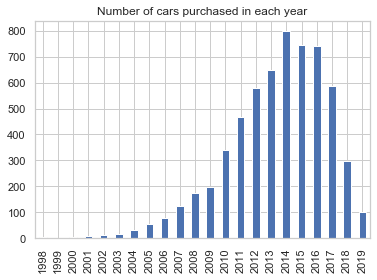

In [45]:
plt.title("Number of cars purchased in each year")
train_data.Year.value_counts().sort_index().plot(kind='bar')
plt.show()


Purchase of cars was very low during 1998-2003 but it gradually increased and reached the peak in the period 2014-2016. But it decreased gradually.

### Fuel Type

In [46]:
train_data['Fuel_Type'].nunique()

5

In [47]:
train_data['Fuel_Type'].unique()

array(['CNG', 'Diesel', 'Petrol', 'LPG', 'Electric'], dtype=object)

In [48]:
train_data['Fuel_Type'].value_counts()

Diesel      3205
Petrol      2746
CNG           56
LPG           10
Electric       2
Name: Fuel_Type, dtype: int64

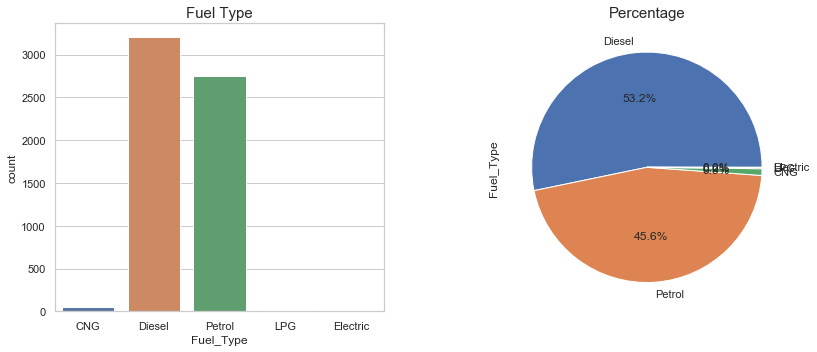

In [49]:
plt.figure(figsize=(15,10))
plt.subplots_adjust(left=0.100,bottom=0.2,right=0.8,top=0.6,wspace=0.3,hspace=0.3)

plt.subplot(121)
plt.title('Fuel Type',fontsize=15)
sb.set(style='whitegrid')
sb.countplot(x=train_data['Fuel_Type'])
plt.subplot(122)
plt.title('Percentage',fontsize=15)
train_data['Fuel_Type'].value_counts().plot.pie(autopct='%1.1f%%')


Most of the cars purchased run on diesel and petrol. Purchase of the electric cars is the least.

### Transmission

In [50]:
train_data['Transmission'].nunique()

2

In [51]:
train_data['Transmission'].unique()

array(['Manual', 'Automatic'], dtype=object)

In [52]:
train_data['Transmission'].value_counts()

Manual       4299
Automatic    1720
Name: Transmission, dtype: int64

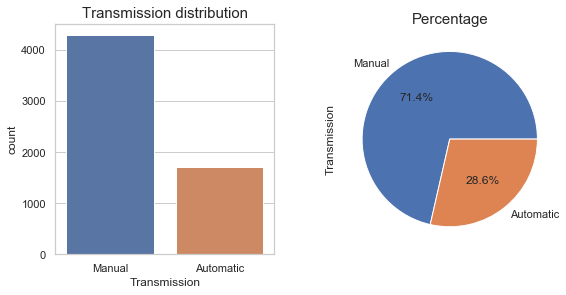

In [53]:
plt.figure(figsize=(10,8))
plt.subplots_adjust(left=0.100,bottom=0.2,right=0.8,top=0.6,wspace=0.3,hspace=0.3)

plt.subplot(121)
plt.title('Transmission distribution',fontsize=15)
sb.set(style='whitegrid')
sb.countplot(x=train_data['Transmission'])
plt.subplot(122)
plt.title('Percentage',fontsize=15)
train_data['Transmission'].value_counts().plot.pie(autopct='%1.1f%%')


Manual cars have the highest sales than the automatic cars.

### Seats

In [54]:
train_data['Seats'].nunique()

9

In [55]:
train_data['Seats'].unique()

array([ 5.,  7.,  8.,  4.,  6.,  2., 10.,  9.,  0.])

In [56]:
train_data['Seats'].value_counts()

5.0     5056
7.0      674
8.0      134
4.0       99
6.0       31
2.0       16
10.0       5
9.0        3
0.0        1
Name: Seats, dtype: int64

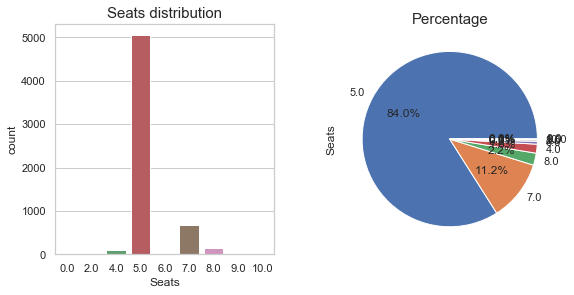

In [57]:
plt.figure(figsize=(10,8))
plt.subplots_adjust(left=0.100,bottom=0.2,right=0.8,top=0.6,wspace=0.3,hspace=0.3)

plt.subplot(121)
plt.title('Seats distribution',fontsize=15)
sb.set(style='whitegrid')
sb.countplot(x=train_data['Seats'])
plt.subplot(122)
plt.title('Percentage',fontsize=15)
train_data['Seats'].value_counts().plot.pie(autopct='%1.1f%%')


5-seater cars were sold more than any other cars.

## BIVARIATE ANALYSIS


(array([-20.,   0.,  20.,  40.,  60.,  80., 100., 120., 140., 160., 180.]),
 <a list of 11 Text xticklabel objects>)

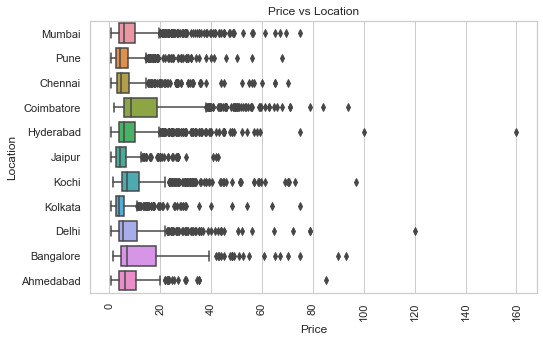

In [58]:
plt.figure(figsize=(8,5))
plt.title("Price vs Location")
sb.boxplot(y=train_data['Location'],x=train_data['Price'])
plt.xticks(rotation=90)

(array([-20.,   0.,  20.,  40.,  60.,  80., 100., 120., 140., 160., 180.]),
 <a list of 11 Text xticklabel objects>)

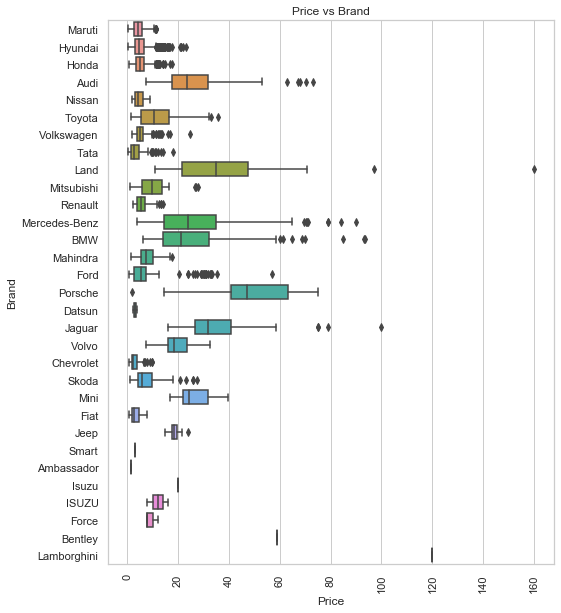

In [59]:
plt.figure(figsize=(8,10))
plt.title("Price vs Brand")
sb.boxplot(y=train_data['Brand'],x=train_data['Price'])
plt.xticks(rotation=90)

(array([-25.,   0.,  25.,  50.,  75., 100., 125., 150., 175.]),
 <a list of 9 Text xticklabel objects>)

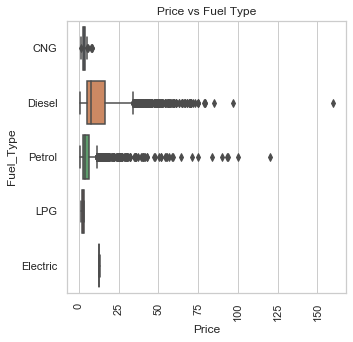

In [60]:
plt.figure(figsize=(5,5))
plt.title("Price vs Fuel Type")
sb.boxplot(y=train_data['Fuel_Type'],x=train_data['Price'])
plt.xticks(rotation=90)

(array([-25.,   0.,  25.,  50.,  75., 100., 125., 150., 175.]),
 <a list of 9 Text xticklabel objects>)

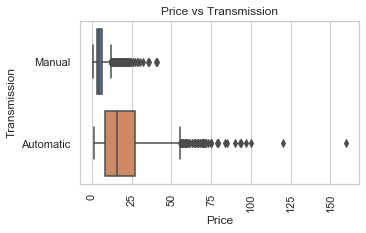

In [61]:
plt.figure(figsize=(5,3))
plt.title("Price vs Transmission")
sb.boxplot(y=train_data['Transmission'],x=train_data['Price'])
plt.xticks(rotation=90)

(array([-25.,   0.,  25.,  50.,  75., 100., 125., 150., 175.]),
 <a list of 9 Text xticklabel objects>)

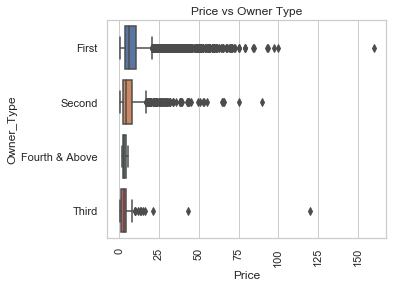

In [62]:
plt.figure(figsize=(5,4))
plt.title("Price vs Owner Type")
sb.boxplot(y=train_data['Owner_Type'],x=train_data['Price'])
plt.xticks(rotation=90)

In [63]:
train_data.corr()

,Year,Kilometers_Driven,Seats,Price
Year,1.000000,-0.173048,0.015204,0.305327
Kilometers_Driven,-0.173048,1.000000,0.082782,-0.011493
Seats,0.015204,0.082782,1.000000,0.052811
Price,0.305327,-0.011493,0.052811,1.000000


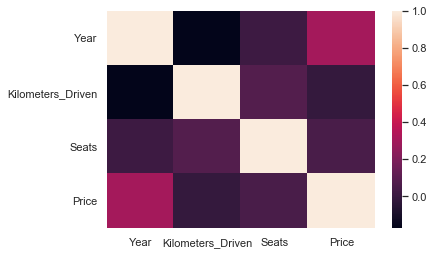

In [64]:
sb.heatmap(train_data.corr())

## MULTIVARIATE ANALYSIS

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30]),
 <a list of 31 Text xticklabel objects>)

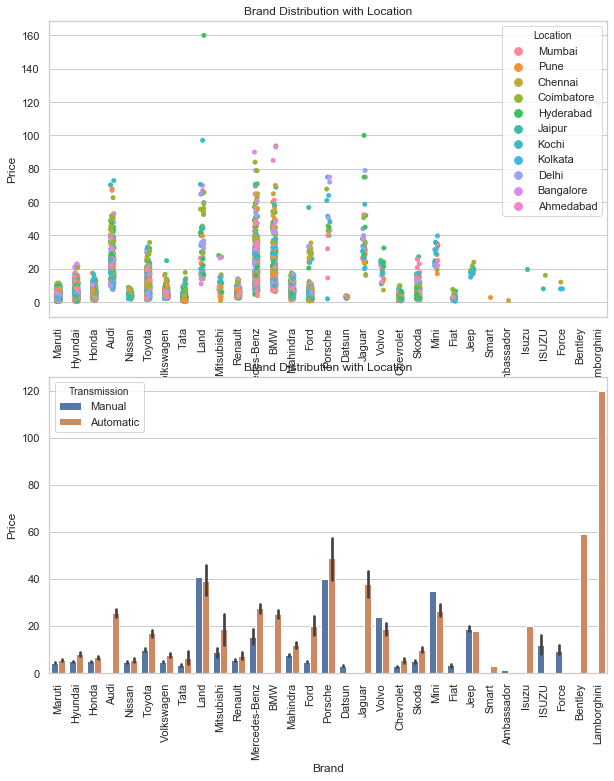

In [65]:
plt.figure(figsize=(10,12))

plt.subplot(2,1,1)
plt.title("Brand Distribution with Location")
sb.stripplot(x=train_data['Brand'],y=train_data['Price'],hue=train_data['Location'])
plt.xticks(rotation=90)
plt.subplot(2,1,2)
plt.title("Brand Distribution with Location")
sb.barplot(x=train_data['Brand'],y=train_data['Price'],hue=train_data['Transmission'])
plt.xticks(rotation=90)

From graph-1, we observe that Mercedes-Benz, BMW, Jaguar, Audi and Land brands are costlier than the rest of the brands and are almost equally purchased in all the cities.

From graph-2, we observe that price of the automatic cars is higher than than the manual cars in all the brands.

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30]),
 <a list of 31 Text xticklabel objects>)

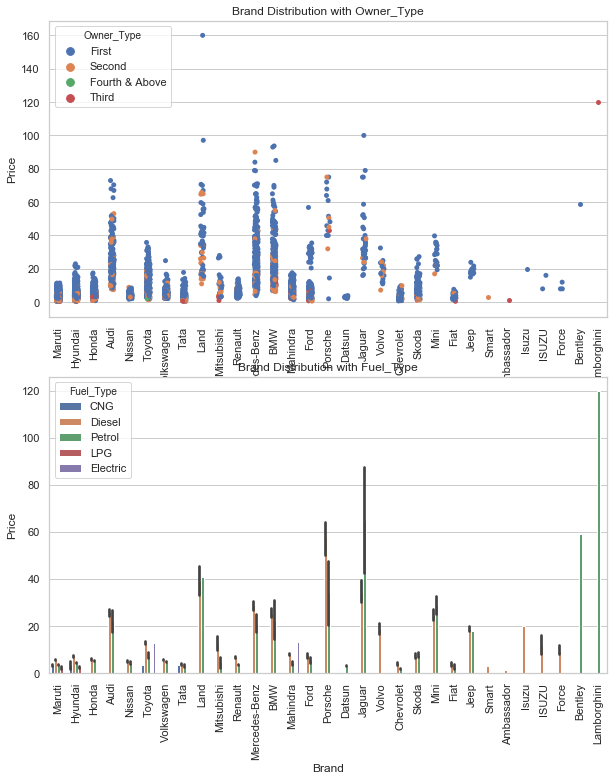

In [66]:

plt.figure(figsize=(10,12))

plt.subplot(2,1,1)
plt.title("Brand Distribution with Owner_Type")
sb.stripplot(x=train_data['Brand'],y=train_data['Price'],hue=train_data['Owner_Type'])
plt.xticks(rotation=90)
plt.subplot(2,1,2)
plt.title("Brand Distribution with Fuel_Type")
sb.barplot(x=train_data['Brand'],y=train_data['Price'],hue=train_data['Fuel_Type'])
plt.xticks(rotation=90)

From graph-2, we infer that diesel cars are costly compared to the rest in almost all the brands. 

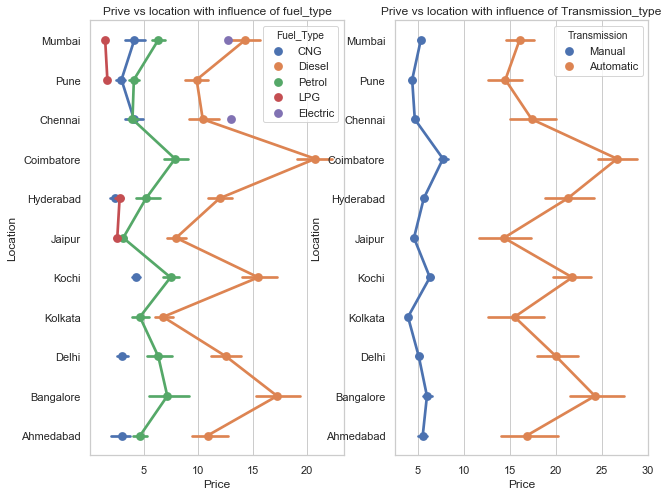

In [67]:
plt.figure(figsize=(10,8))
plt.subplot(1,2,1)
plt.title("Prive vs location with influence of fuel_type")
sb.pointplot(y=train_data['Location'],x=train_data['Price'],hue=train_data["Fuel_Type"])
plt.subplot(1,2,2)
plt.title("Prive vs location with influence of Transmission_type")
sb.pointplot(y=train_data['Location'],x=train_data['Price'],hue=train_data["Transmission"])


Text(0.5, 1.0, 'Price vs location with influence of Owner_type')

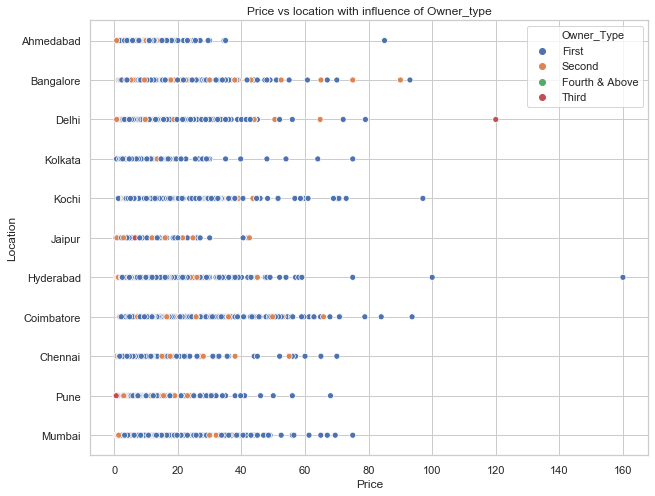

In [68]:

plt.figure(figsize=(10,8))
sb.scatterplot(y=train_data['Location'],x=train_data['Price'],hue=train_data["Owner_Type"])
plt.title("Price vs location with influence of Owner_type")


Prices of second-hand cars are higher than the second-hand cars in all the cities. But But even the second-hand cars are higher in some cities like Banglore, Delhi and Coimbatore.

### Assigning numerical values for better understanding

In [69]:
train_data['Transmission'] = train_data['Transmission'].map({'Manual' : 0, 'Automatic' : 1})

test_data['Transmission'] = test_data['Transmission'].map({'Manual' : 0, 'Automatic' : 1})

In [70]:
Fuel = {  'Electric':0,'Diesel':1 ,'Petrol':2, 'LPG':3,'CNG':4}
train_data['Fuel'] = [Fuel[item] for item in train_data['Fuel_Type']]
train_data.sample(5)

,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Seats,Price,Brand,Model,Fuel
1259,Bangalore,2010,125000,Diesel,1,Second,5.0,11.00,Land,Rover,1
5689,Kochi,2010,69918,Petrol,0,First,5.0,2.83,Maruti,SX4,2
1450,Chennai,2012,49000,Petrol,0,First,5.0,4.90,Maruti,Swift,2
895,Kochi,2015,42076,Diesel,1,First,5.0,21.80,Mercedes-Benz,E-Class,1
5365,Mumbai,2009,52100,Diesel,1,Second,5.0,7.50,BMW,3,1


In [71]:
train_data['Owner_Type'] = train_data['Owner_Type'].map({'First': 1,'Second': 2,'Fourth & Above': 4, 'Third': 3})
test_data['Owner_Type'] = test_data['Owner_Type'].map({'First': 1,'Second': 2,'Fourth & Above': 4, 'Third': 3})


In [72]:
train_data.head(5)

,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Seats,Price,Brand,Model,Fuel
0,Mumbai,2010,72000,CNG,0,1,5.0,1.75,Maruti,Wagon,4
1,Pune,2015,41000,Diesel,0,1,5.0,12.50,Hyundai,Creta,1
2,Chennai,2011,46000,Petrol,0,1,5.0,4.50,Honda,Jazz,2
3,Chennai,2012,87000,Diesel,0,1,7.0,6.00,Maruti,Ertiga,1
4,Coimbatore,2013,40670,Diesel,1,2,5.0,17.74,Audi,A4,1


In [73]:
train_data.sample(5)

,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Seats,Price,Brand,Model,Fuel
1257,Kolkata,2013,43000,Diesel,0,1,7.0,7.00,Mahindra,XUV500,1
3679,Hyderabad,2017,10000,Diesel,1,1,5.0,36.00,Mercedes-Benz,New,1
5655,Mumbai,2015,22001,CNG,0,1,5.0,3.65,Maruti,Wagon,4
4978,Kochi,2019,25717,Petrol,1,1,5.0,8.86,Honda,Amaze,2
3950,Delhi,2010,60000,Petrol,1,2,5.0,4.65,Toyota,Corolla,2


In [74]:
test_data.sample(5)

,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Seats,Brand,Model
1017,Hyderabad,2008,44379,Petrol,0,1,5.0,Hyundai,Santro
306,Kolkata,2015,73000,Diesel,0,1,8.0,Toyota,Innova
260,Coimbatore,2018,14730,Petrol,1,1,5.0,Jaguar,XE
1059,Kolkata,2017,13000,Diesel,0,1,5.0,Honda,City
732,Pune,2011,124000,Diesel,0,1,7.0,Toyota,Fortuner


## Splitting of data

It is important to split the training data to find the accuracy for the model.

In [75]:
x=train_data[['Location','Kilometers_Driven','Transmission','Fuel_Type','Owner_Type','Brand','Model','Seats','Year']]

In [76]:
y=train_data[['Price']]

In [77]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size = 0.4)

In [78]:
x_train

,Location,Kilometers_Driven,Transmission,Fuel_Type,Owner_Type,Brand,Model,Seats,Year
1622,Delhi,60095,0,Diesel,1,Maruti,Swift,5.0,2015
1948,Mumbai,49999,0,Petrol,1,Honda,City,5.0,2011
499,Mumbai,35000,1,Petrol,1,Honda,Brio,5.0,2014
2860,Hyderabad,98500,0,Diesel,1,Tata,Bolt,5.0,2017
5282,Mumbai,100000,1,Diesel,1,Mercedes-Benz,M-Class,5.0,2011
...,...,...,...,...,...,...,...,...,...
5827,Ahmedabad,30000,0,Diesel,1,Hyundai,i20,5.0,2018
5250,Bangalore,38000,0,Petrol,2,Hyundai,Verna,5.0,2008
5897,Kolkata,12000,0,Petrol,1,Toyota,Etios,5.0,2015
4936,Hyderabad,50000,1,Diesel,1,Audi,A6,5.0,2015


In [79]:
y_train

,Price
1622,4.75
1948,3.80
499,4.25
2860,6.00
5282,14.41
...,...
5827,7.75
5250,2.60
5897,4.50
4936,36.00


## Linear Regression

### Changing the categorical variables to numerical using label encoder

In [80]:
prep_data = LabelEncoder()
x_train["Brand"] =prep_data.fit_transform(x_train["Brand"])
x_train["Model"] = prep_data.fit_transform(x_train["Model"])
x_train["Location"] = prep_data.fit_transform(x_train["Location"])
x_train["Fuel_Type"] = prep_data.fit_transform(x_train["Fuel_Type"])
x_train["Owner_Type"] = prep_data.fit_transform(x_train["Owner_Type"])
x_test["Brand"] =prep_data.fit_transform(x_test["Brand"])
x_test["Model"] = prep_data.fit_transform(x_test["Model"])
x_test["Location"] = prep_data.fit_transform(x_test["Location"])
x_test["Fuel_Type"] = prep_data.fit_transform(x_test["Fuel_Type"])
x_test["Owner_Type"] = prep_data.fit_transform(x_test["Owner_Type"])
test_data["Brand"] =prep_data.fit_transform(test_data["Brand"])
test_data["Model"] = prep_data.fit_transform(test_data["Model"])
test_data["Location"] = prep_data.fit_transform(test_data["Location"])
test_data["Fuel_Type"] = prep_data.fit_transform(test_data["Fuel_Type"])
test_data["Owner_Type"] = prep_data.fit_transform(test_data["Owner_Type"])

C:\Users\user\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\user\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\user\anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = valu

### PREPARING A MODEL.

In [81]:
ss = StandardScaler()
xr_train = ss.fit_transform(x_train)
xr_test = ss.transform(x_test)
lreg = LinearRegression()
lreg.fit(xr_train,y_train)
y_pred_linear = lreg.predict(xr_test)
print('The Score on the train set with a linear regression is:', lreg.score(xr_train,y_train))
print('The Score on the test set with a linear regression is:', lreg.score(xr_test,y_test))
print("Accuracy :",lreg.score(xr_test,y_test)*100,'%')
# The Root mean squared error
print("Mean squared error (rmse): %.2f" % np.sqrt(mean_squared_error(y_test, y_pred_linear)))
print("The r2_score is: ", r2_score(y_test, y_pred_linear))
y_pred_linear

The Score on the train set with a linear regression is: 0.4516226955303465
The Score on the test set with a linear regression is: 0.4538763068563635
Accuracy : 45.387630685636346 %
Mean squared error (rmse): 7.87
The r2_score is:  0.4538763068563635


array([[ 7.71069384],
       [ 6.34770009],
       [ 8.54563047],
       ...,
       [ 7.50115262],
       [ 8.06614339],
       [26.68769611]])

In [82]:
lreg.predict(test_data)

array([[248553.37710946],
       [330647.92776818],
       [206781.47970712],
       ...,
       [170495.51478242],
       [317373.28469929],
       [439389.48788629]])

The model above is a lenear regression model and we see that the accuracy of model is 45% to improve the accuracy of the model we go for another model i.e Random forest regression model

## Random forest regression

In [83]:
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators = 100, random_state = 0)
regressor.fit(x_train,y_train)
y_test_pred_rf=regressor.predict(x_test)
print('The Score on the training set with  a Random Forest  regression is:', regressor.score(x_train,y_train))
print(' The Score on the test set with a hyperparameter optimized random forest regressor is:',regressor.score(x_test,y_test))
print("Accuracy :",regressor.score(x_test,y_test)*100,'%')
# The Root mean squared error
print("Mean squared error: %.2f" % np.sqrt(mean_squared_error(y_test, y_test_pred_rf)))
print("The r2_score is: ", r2_score(y_test, y_test_pred_rf))
y_test_pred_rf


C:\Users\user\anaconda3\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


The Score on the training set with  a Random Forest  regression is: 0.9696971535561342
 The Score on the test set with a hyperparameter optimized random forest regressor is: 0.6984998344855312
Accuracy : 69.84998344855312 %
Mean squared error: 5.85
The r2_score is:  0.6984998344855312


array([ 2.9265,  3.307 ,  6.6803, ...,  9.0806,  3.7062, 38.4917])

Here we've got a good accuracy model with accuracy 70%.so,we are using this model for final prediction of price.

In [84]:
from sklearn.model_selection import RandomizedSearchCV
RFR = RandomForestRegressor()
n_estimators = [1 , 2 , 4, 8 , 16, 32, 64, 100, 200]
max_features = ['auto', 'sqrt']
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
min_samples_split = [2, 5, 10]
min_samples_leaf = [1, 2, 4]
bootstrap = [True, False]
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
rf_random = RandomizedSearchCV(estimator = RFR, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
best_model = rf_random.fit(x_train, y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    4.9s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:   14.0s
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:   27.3s finished
C:\Users\user\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:739: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


In [85]:
rand_est = RandomForestRegressor(n_estimators= 100, min_samples_split= 5, min_samples_leaf= 1, max_features= 'auto',max_depth=100,bootstrap=True)
rand_est.fit(x_train,y_train)
y_pred_rfr = rand_est.predict(x_test)
print(' The Score on the train set with a hyperparameter optimized random forest regressor is:',rand_est.score(x_train,y_train))
print(' The Score on the test set with a hyperparameter optimized random forest regressor is:',rand_est.score(x_test,y_test))
print("Mean squared error: %.2f"
      % np.sqrt(mean_squared_error(y_test, y_pred_rfr)))

C:\Users\user\anaconda3\lib\site-packages\ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


 The Score on the train set with a hyperparameter optimized random forest regressor is: 0.9451184195987625
 The Score on the test set with a hyperparameter optimized random forest regressor is: 0.6910254720384057
Mean squared error: 5.92


In [86]:
app_test=test_data
app_test.dtypes

Location               int32
Year                   int64
Kilometers_Driven      int64
Fuel_Type              int32
Transmission           int64
Owner_Type             int64
Seats                float64
Brand                  int32
Model                  int32
dtype: object

In [87]:
app_test.Seats=app_test.Seats.astype(int)
app_test.dtypes

Location             int32
Year                 int64
Kilometers_Driven    int64
Fuel_Type            int32
Transmission         int64
Owner_Type           int64
Seats                int32
Brand                int32
Model                int32
dtype: object

In [88]:
rf_model = pickle.dumps(rand_est) 
rand_est_from_pickle = pickle.loads(rf_model) 
Final_Prediction=rand_est_from_pickle.predict(app_test.values) 

In [89]:
Final_Prediction

array([11.59502631, 18.54347223, 10.52771129, ..., 10.43182462,
       18.28265833, 10.51522886])

The above values are the cost of cars predicted on the testing data.